# Testimonal for Microsoft's New Visual Studio

This project is a representation of a suppositional scenario in which Microsoft is entering a business of creating movies. I as a Data Scientist is assigned to help Microsoft decide what type of film they should be creating by translating my findings into actionable insights.

# Goals

In this notebook I am going to explore the relationship between movie's success and movie's finance, movie's genre, movie's runtime and production budget profit. It is my decision to use profit and ROI as the predominant indicators of success.

## Data

In [2]:
#importing stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import seaborn as sns 
import sqlite3
pd.set_option('display.max_rows', 100) 

In [3]:
con = sqlite3.connect('../zippedData/mahum_db.db')
cursor = con.cursor()

In [4]:
#readind files via sql
movies_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", con)

movies_df.head(10)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [5]:
#reading movie_basics file
movie_basics = \
"""
SELECT *
FROM movie_basics
"""
movie_df = pd.read_sql("""

SELECT *
FROM movie_basics

""", con)

movie_df.head(21)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [7]:
cursor.execute(movie_basics)


In [8]:
cursor.fetchall()

[('tt0063540', 'Sunghursh', 'Sunghursh', 2013, 175.0, 'Action,Crime,Drama'),
 ('tt0066787',
  'One Day Before the Rainy Season',
  'Ashad Ka Ek Din',
  2019,
  114.0,
  'Biography,Drama'),
 ('tt0069049',
  'The Other Side of the Wind',
  'The Other Side of the Wind',
  2018,
  122.0,
  'Drama'),
 ('tt0069204',
  'Sabse Bada Sukh',
  'Sabse Bada Sukh',
  2018,
  None,
  'Comedy,Drama'),
 ('tt0100275',
  'The Wandering Soap Opera',
  'La Telenovela Errante',
  2017,
  80.0,
  'Comedy,Drama,Fantasy'),
 ('tt0111414', 'A Thin Life', 'A Thin Life', 2018, 75.0, 'Comedy'),
 ('tt0112502', 'Bigfoot', 'Bigfoot', 2017, None, 'Horror,Thriller'),
 ('tt0137204',
  'Joe Finds Grace',
  'Joe Finds Grace',
  2017,
  83.0,
  'Adventure,Animation,Comedy'),
 ('tt0139613', 'O Silêncio', 'O Silêncio', 2012, None, 'Documentary,History'),
 ('tt0144449',
  'Nema aviona za Zagreb',
  'Nema aviona za Zagreb',
  2012,
  82.0,
  'Biography'),
 ('tt0146592', 'Pál Adrienn', 'Pál Adrienn', 2010, 136.0, 'Drama'),
 ('tt

In [9]:
#setting new dataframe for movie_basics
movies_df = pd.read_sql(movie_basics, con)

In [10]:
#identifying duplicates
def determine_dupes(series):
    series_vcs = pd.Series(series.value_counts())
    series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
    print("Amount of unique duplicate movie title: " + str(len(series_dupes)))
    print("Total amount of duplicate movie titles: " + str(series_vcs[0:len(series_dupes)].sum()))
    
    return series_vcs

determine_dupes(movie_df['primary_title'])

Amount of unique duplicate movie title: 6182
Total amount of duplicate movie titles: 16255


Home                     24
Broken                   20
The Return               20
Homecoming               16
Alone                    16
                         ..
Green on Green            1
Together, Wan Di Rak      1
Urban & the Shed Crew     1
Absence blízkosti         1
The Dunning Man           1
Name: primary_title, Length: 136071, dtype: int64

In [11]:
movie_df.reset_index(inplace=True)
movie_df.rename(columns={'index' : 'g_unique_id'}, inplace=True)
movie_df


,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [16]:
#creating a new dataframe for duplicate movie titles
title_vcs = pd.Series(movie_df['primary_title'].value_counts())
movie_title = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
movie_title_df = movie_df[movie_df['primary_title'].isin(movie_title)].copy()
movie_title_df['updated_title'] = movie_title_df['primary_title'] + ' ' + movie_title_df['start_year'].astype(str)
movie_title_df

,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery",Los pájaros se van con la muerte 2011
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",Godfather 2012
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,Life's a Beach 2012
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",Snowblind 2015
...,...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller",Bacchanalia 2017
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama",Paradise 2019
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,Albatross 2017
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,Drømmeland 2019


In [17]:
#removing the columns that we need to merge and do not want to dupliacte
remove_columns = ['movie_id', 'primary_title', 'original_title', 'start_year', 'genres', 'runtime_minutes']
movie_title_df.drop(columns=remove_columns, inplace=True)

#merging movie_df and movie_title_df
movie_and_title_df = pd.merge(left=movie_df, right=movie_title_df, on=['g_unique_id'], how ='left')
movie_and_title_df.head(10)

,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN


In [19]:
#this will take couple min to load
movie_and_title_df['title_NaN'] = movie_and_title_df['updated_title'].isnull()
movie_and_title_df.head(16)
for movie_index in list(range(len(movie_and_title_df.index))):
    if ~movie_and_title_df.loc[movie_index, 'title_NaN']:
        movie_and_title_df.loc[movie_index, 'primary_title'] = movie_and_title_df.loc[movie_index, 'updated_title']
movie_and_title_df.head(16)

,g_unique_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,updated_title,title_NaN
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,True
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,True
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,True
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,True
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,True
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,True
6,6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017,False
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN,True
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN,True
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN,True


In [20]:
#removing unwanted columns
remove_columns = ['g_unique_id','updated_title', 'title_NaN']
movie_and_title_df.drop(columns=remove_columns, inplace=True)

movie_and_title_df = movie_and_title_df.copy()
display(movie_and_title_df.head(16))
movie_and_title_df.info()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.8+ MB


In [21]:
!ls ../zippedData

#reading csv
bom_gross_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
rt_info_df = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_reviews_df = pd.read_csv('../zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
tmdb_movies_df = pd.read_csv('../zippedData/tmdb.movies.csv.gz')
tn_movie_budgets_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')

#using bom grosstable
bgross_df = bom_gross_df

#determing dupes in bgross_df
determine_dupes(bgross_df['title'])

#using rotten tomato table
rt_info_df
rt_df = rt_info_df.copy()

#dropping thr column 'id'
rt_df.drop(columns='id', inplace=True)

#removing unwanted columns
remove_columns = ['synopsis', 'rating', 'writer', 'theater_date', 'dvd_date', 'currency', ]
rt_df.drop(columns=remove_columns, inplace=True)

#renaming column of genres
rt_df.rename(columns={'genre' : 'genres'}, inplace=True)
display(rt_df)


bom.movie_gross.csv.gz
im.db.zip
mahum_db
mahum_db.db
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
Amount of unique duplicate movie title: 1
Total amount of duplicate movie titles: 2


,genres,director,box_office,runtime,studio
0,Action and Adventure|Classics|Drama,William Friedkin,NaN,104 minutes,NaN
1,Drama|Science Fiction and Fantasy,David Cronenberg,"600,000",108 minutes,Entertainment One
2,Drama|Musical and Performing Arts,Allison Anders,NaN,116 minutes,NaN
3,Drama|Mystery and Suspense,Barry Levinson,NaN,128 minutes,NaN
4,Drama|Romance,Rodney Bennett,NaN,200 minutes,NaN
...,...,...,...,...,...
1555,Action and Adventure|Horror|Mystery and Suspense,NaN,"33,886,034",106 minutes,New Line Cinema
1556,Comedy|Science Fiction and Fantasy,Steve Barron,NaN,88 minutes,Paramount Vantage
1557,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,111 minutes,NaN
1558,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,NaN,101 minutes,NaN


# Data cleaning

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   profit_margin      5782 non-null   float64
 7   ROI                5782 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 361.5+ KB


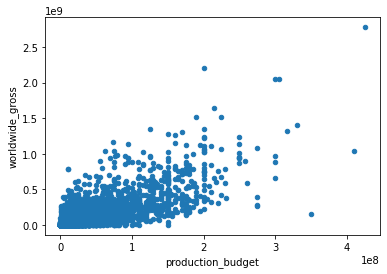

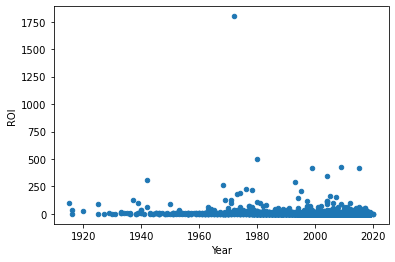

In [22]:
#renaming
finance_df = tn_movie_budgets_df

#function for cleaning
def clean_a_money_column(df, series_title):
    
    df[series_title] = df[series_title].astype(str).str.replace('$','')
    df[series_title] = df[series_title].astype(str).str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df

#cleaning
finance_df = clean_a_money_column(finance_df,'worldwide_gross')
finance_df = clean_a_money_column(finance_df,'domestic_gross')
finance_df = clean_a_money_column(finance_df,'production_budget')
display(finance_df)

# finance_df.sort_values(['Profit Margin'], ascending=False, inplace=True) # Sort by largest Profit Margin

numerator = finance_df['worldwide_gross'] - finance_df['production_budget']
finance_df['profit_margin'] = (numerator*100)/finance_df['worldwide_gross']
finance_df.loc[finance_df['profit_margin'] == float('-inf'), 'profit_margin'] = 0
finance_df['ROI'] = finance_df['worldwide_gross']/finance_df['production_budget']

#scatter plot
finance_df.plot('production_budget', 'worldwide_gross', kind='scatter');

#info
finance_df.info()

#dropping 'id column'
finance_df.drop(columns='id', inplace=True)

#adding columns
finance_df['Year'] = pd.to_numeric(finance_df['release_date'].map(lambda x: x[-4:]))
finance_df['Month'] = finance_df['release_date'].map(lambda x: x[:3])

finance_df.plot('Year' , 'ROI',  kind = 'scatter');

# Functions 

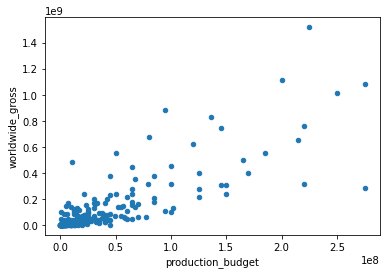

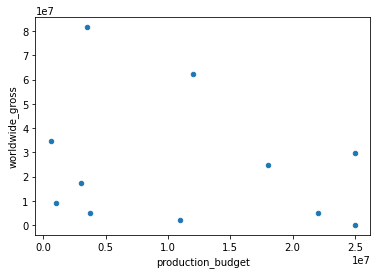

In [23]:
#functions to pull years, months out of the data set. Can also be used for other column types?
#for now, use int types for the year
def year_iso (df, year):
    output_df = df[df['Year'] == year]
    return output_df
#for now, with money_metrics_df, use three letter abreviations for months
def month_iso (df, month):
    output_df = df[df['Month'] == month]
    return output_df

#plotting
fddf_2015 = year_iso(finance_df, 2012)

fddf_2015.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');

#comparing
fddf_1999 = year_iso(finance_df, 1970)

fddf_1999.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');


Amount of unique duplicate movie title: 81
Total amount of duplicate movie titles: 165


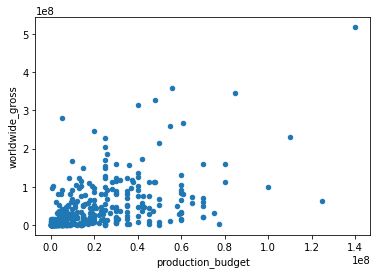

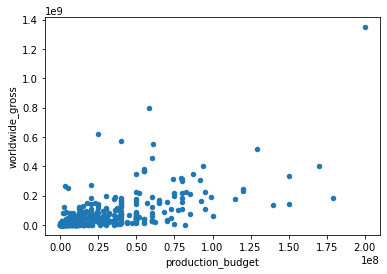

In [24]:
determine_dupes(finance_df['movie'])

#Automating year pull outs on money_metrics_df, not sure the best way to do this, but for now, list of dataframes?
year_range = list(range(1915,2021))
year_range
year_keys = []
for i in year_range:
    keystring = ''
    keystring = str(i) + ' money_metric_df'
    year_keys.append(keystring)

list_of_dfs_years = []
for i in year_range:
    df_out = year_iso (finance_df, i)
    list_of_dfs_years.append(df_out)
    
years_and_dfs = dict(zip(year_keys,list_of_dfs_years))

years_and_dfs['2019 money_metric_df']
#okay, now we just gotta join things

years_and_dfs.keys()

jan_fddf = month_iso(finance_df,'Jan')
feb_fddf = month_iso(finance_df,'Feb')

jan_fddf.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');
feb_fddf.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');
#To compare months, for example

In [25]:
# Create a unique ID column within finance_df so that merge with finance_dupes_df goes smoothly later.

finance_df.reset_index(inplace=True)
finance_df.rename(columns={'index' : 'finance_unique_id'}, inplace=True)
finance_df

# Create a DataFrame of all the duplicate movie titles.
title_vcs = pd.Series(finance_df['movie'].value_counts())
finance_dupes = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
finance_dupes_df = finance_df[finance_df['movie'].isin(finance_dupes)].copy()
# finance_dupes_df

# Create a new column called 'updated_title' that includes the name of the movie and the year of the movie.
finance_dupes_df['updated_title'] = finance_dupes_df['movie'] + ' ' + finance_dupes_df['Year'].astype(str)

determine_dupes(finance_dupes_df['updated_title'])

#remove columns
remove_columns = ['movie', 'production_budget', 'domestic_gross',
                  'worldwide_gross', 'profit_margin', 'ROI', 'Year', 'Month','release_date']
finance_dupes_df.drop(columns=remove_columns, inplace=True)


Amount of unique duplicate movie title: 1
Total amount of duplicate movie titles: 2


In [28]:
#merging
finance_and_dupes_df = pd.merge(left=finance_df, right=finance_dupes_df, on=['finance_unique_id'], how ='left')

finance_and_dupes_df['title_NaN'] = finance_and_dupes_df['updated_title'].isnull()
finance_and_dupes_df.head(25)
for movie_index in list(range(len(finance_and_dupes_df.index))):
     if ~finance_and_dupes_df.loc[movie_index, 'title_NaN']:
        finance_and_dupes_df.loc[movie_index, 'movie'] = finance_and_dupes_df.loc[movie_index, 'updated_title']
        
#remove columns
remove_columns = ['finance_unique_id','updated_title', 'title_NaN']
finance_and_dupes_df.drop(columns=remove_columns, inplace=True)

finance_and_dupes_df = finance_and_dupes_df.copy()

#merging tn movie data with imdb basic title
movie_and_title_df.rename(columns={'primary_title' : 'movie'}, inplace=True)
display(movie_and_title_df)

fd_and_mt_df = pd.merge(left=finance_and_dupes_df, right=movie_and_title_df, on='movie', how ='left')

,movie_id,movie,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [29]:
#Manual data cleaning
fd_and_mt_df.loc[fd_and_mt_df['movie'] == 'Avatar', 'genres'] = "Action,Adventure,Fantasy"

unaltered_mmt_df = movie_df.copy()
unaltered_mmt_df.rename(columns={'primary_title' : 'movie'}, inplace=True)

fd_and_mt_df = fd_and_mt_df.copy()
fd_and_mt_df = pd.merge(left=fd_and_mt_df, right=unaltered_mmt_df, on='movie', how ='left')

#determine dupes
determine_dupes(fd_and_mt_df['movie'])

Amount of unique duplicate movie title: 533
Total amount of duplicate movie titles: 1718


The Return                           20
Freedom                              14
The Journey                          11
The Promise                          10
Forget Me Not                        10
                                     ..
Get Smart                             1
Her Cry: La Llorona Investigation     1
Thinner                               1
The Other Guys                        1
The Adventures of Tintin              1
Name: movie, Length: 5781, dtype: int64

In [30]:
fd_and_mt_df['is_movie_id_x_NaN'] = fd_and_mt_df['movie_id_x'].isnull()
fd_and_mt_df['is_movie_id_y_NaN'] = fd_and_mt_df['movie_id_y'].isnull()

for movie_index in list(range(len(fd_and_mt_df.index))):
    if (fd_and_mt_df.loc[movie_index, 'is_movie_id_x_NaN']) and (~fd_and_mt_df.loc[movie_index, 'is_movie_id_y_NaN'])\
        and (fd_and_mt_df.loc[movie_index, 'start_year_y'].astype('int64') == fd_and_mt_df.loc[movie_index, 'Year']):
            fd_and_mt_df.loc[movie_index, 'movie_id_x'] = fd_and_mt_df.loc[movie_index, 'movie_id_y']
            fd_and_mt_df.loc[movie_index, 'original_title_x'] = fd_and_mt_df.loc[movie_index, 'original_title_y']
            fd_and_mt_df.loc[movie_index, 'start_year_x'] = fd_and_mt_df.loc[movie_index, 'start_year_y']
            fd_and_mt_df.loc[movie_index, 'genres_x'] = fd_and_mt_df.loc[movie_index, 'genres_y']
            
#remove columns
remove_columns = ['is_movie_id_x_NaN', 'is_movie_id_y_NaN', 'movie_id_y', 'original_title_y', 
                  'start_year_y','genres_y']
fd_and_mt_df.drop(columns=remove_columns, inplace=True)

#rename
fd_and_mt_df.rename(columns={'movie_id_x': 'movie_id', 'original_title_x': 'original_title',
                                 'start_year_x': 'start_year', 'genres_x': 'genres'}, inplace=True)
#shape of recent df
display(fd_and_mt_df.head(1))
fd_and_mt_df.shape

#removing columns
remove_columns = ['start_year']
fd_and_mt_df.drop(columns=remove_columns, inplace=True)

#rename for bgross column
bgross_df.rename(columns={'title' : 'movie'}, inplace=True)
display(bgross_df)

fd_mt_bg_df =pd.concat([fd_and_mt_df, bgross_df], axis=0)

#removing
remove_columns = ['original_title']
fd_mt_bg_df.drop(columns=remove_columns, inplace=True)

#concatation
fd_mt_bg_rt_df= pd.concat([fd_mt_bg_df, rt_df])
display(fd_mt_bg_rt_df.head(1))
fd_mt_bg_rt_df.shape

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,original_title,start_year,runtime_minutes_x,genres,g_unique_id,runtime_minutes_y
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,Dec,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy",17060.0,93.0


,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,g_unique_id,runtime_minutes_y,studio,foreign_gross,year,director,box_office,runtime
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"Action,Adventure,Fantasy",17060.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN


(11913, 20)

In [31]:
fd_mt_bg_rt_df_null_values = fd_mt_bg_rt_df['movie_id'].isna().sum()
print(f'Rows with Null Values in movie_id Column: {fd_mt_bg_rt_df_null_values}')

fd_mt_bg_rt_df.dropna(subset=['movie_id'], axis=0, inplace=True)

display(fd_mt_bg_rt_df.head(100))
display(fd_mt_bg_rt_df.info())
pd.set_option('display.max_columns', None)

remove_columns = ['g_unique_id']
fd_mt_bg_rt_df.drop(columns=remove_columns, inplace=True)

fd_mt_bg_rt_df['release_month'] = pd.DatetimeIndex(fd_mt_bg_rt_df['release_date']).month

fd_mt_bg_rt_df_null_values = fd_mt_bg_rt_df['genres'].isna().sum()
print(f'Rows with Null Values in genres Column: {fd_mt_bg_rt_df_null_values}')
NaN_in_fd_mt_bg_rt_df = fd_mt_bg_rt_df[fd_mt_bg_rt_df['genres'].isnull()]
NaN_in_fd_mt_bg_rt_df

fd_mt_bg_rt_df.dropna(subset=['genres'], axis=0, inplace=True)
fd_mt_bg_rt_df

fd_mt_bg_rt_df.reset_index(inplace=True)
fd_mt_bg_rt_df.rename(columns={'index' : 'unique_id'}, inplace=True)
fd_mt_bg_rt_df

series_vcs = pd.Series(fd_mt_bg_rt_df['movie'].value_counts())
series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
sorted(series_dupes)

finance_df['mmdf_uni_id'] = finance_df.index

#calculating ROI
finance_df['Profit Margin']= (finance_df['worldwide_gross']-finance_df['production_budget'])/finance_df['worldwide_gross']
finance_df['ROI'] = (finance_df['worldwide_gross']/finance_df['production_budget'])

finance_df=finance_df.sort_values(['Profit Margin'], ascending=False)

finance_df = finance_df[finance_df['worldwide_gross'] != 0]

#DROPPING DUPLICATES SO THEY DONT MERGE
fd_mt_bg_rt_df.drop_duplicates(subset="movie",
                     keep=False, inplace=True)

fd_mt_bg_rt_df['genres'] = fd_mt_bg_rt_df['genres'].map(lambda x: x.split(','))

#removing columns
remove_columns = ['studio', 'box_office', 'director', 'foreign_gross', 'unique_id']
fd_mt_bg_rt_df.drop(columns=remove_columns, inplace=True)

remove_columns = ['runtime_minutes_y', 'year', 'runtime' ]
fd_mt_bg_rt_df.drop(columns=remove_columns, inplace=True)

fd_mt_bg_rt_df.rename(columns={'runtime_minutes_x' : 'runtime'}, inplace=True)

Rows with Null Values in movie_id Column: 9836


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,Year,Month,movie_id,runtime_minutes_x,genres,g_unique_id,runtime_minutes_y,studio,foreign_gross,year,director,box_office,runtime
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,84.692106,6.532577,2009.0,Dec,tt1775309,93.0,"Action,Adventure,Fantasy",17060.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,60.733080,2.546673,2011.0,May,tt1298650,136.0,"Action,Adventure,Fantasy",6448.0,136.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-133.703598,0.427892,2019.0,Jun,tt6565702,113.0,"Action,Adventure,Sci-Fi",112147.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,76.436443,4.243841,2015.0,May,tt2395427,141.0,"Action,Adventure,Sci-Fi",39010.0,141.0,NaN,NaN,NaN,NaN,NaN,NaN
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,85.352522,6.827114,2018.0,Apr,tt4154756,149.0,"Action,Adventure,Sci-Fi",72820.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN
8,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,54.264473,2.186484,2017.0,Nov,tt0974015,120.0,"Action,Adventure,Fantasy",515.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN
9,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,65.894399,2.932070,2015.0,Nov,tt2379713,148.0,"Action,Adventure,Thriller",38376.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN
10,"Jul 20, 2012",The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,74.641268,3.943415,2012.0,Jul,tt1345836,164.0,"Action,Thriller",6900.0,164.0,NaN,NaN,NaN,NaN,NaN,NaN
11,"May 25, 2018",Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,30.052383,1.429641,2018.0,May,tt3778644,135.0,"Action,Adventure,Fantasy",66299.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN
12,"Jul 2, 2013",The Lone Ranger,275000000.0,89302115.0,2.600021e+08,-5.768370,0.945462,2013.0,Jul,tt1210819,150.0,"Action,Adventure,Western",5898.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 6964
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2077 non-null   object 
 1   movie              2077 non-null   object 
 2   production_budget  2077 non-null   float64
 3   domestic_gross     2077 non-null   float64
 4   worldwide_gross    2077 non-null   float64
 5   profit_margin      2077 non-null   float64
 6   ROI                2077 non-null   float64
 7   Year               2077 non-null   float64
 8   Month              2077 non-null   object 
 9   movie_id           2077 non-null   object 
 10  runtime_minutes_x  1663 non-null   float64
 11  genres             2058 non-null   object 
 12  g_unique_id        2041 non-null   float64
 13  runtime_minutes_y  1926 non-null   float64
 14  studio             0 non-null      object 
 15  foreign_gross      0 non-null      object 
 16  year               0 non

None

Rows with Null Values in genres Column: 19


In [32]:
#setting my final data set as master dataframe
master_df = fd_mt_bg_rt_df

master_df = master_df.fillna(0)
master_df = master_df.astype({"production_budget":'int', "domestic_gross":'int', "Year":'int', "runtime":'int'})

master_df['Profit'] = master_df['worldwide_gross'] - master_df['production_budget']

### Business Recommendation 1

In [34]:
def unique_f(f_series):
    unique_f_set = set()
    unique_f_list = []
    unique_f_dict = {}
    
    unique_f_set = set([f for f_list in f_series for f in f_list])
    unique_f_list = sorted(list(unique_f_set))
    unique_f_dict = {k: v for k, v in enumerate(unique_f_list)}
        
    return(unique_f_dict)

def movies_w_specified_genres(f_df, f_type):
    movies_for_removal = []
     
    for movie_index in list(range(len(f_df.index))):
        test_df = pd.DataFrame(f_df.iloc[movie_index]).T
        if f_type not in test_df['genres'][test_df.index[0]]:
            movies_for_removal.append(test_df['movie_id'][test_df.index[0]])
            
    for movie_for_removal in movies_for_removal:
         f_df = f_df[f_df['movie_id'] != movie_for_removal]
    
    f_df['genre'] = f_type

    return(f_df)

def concatenate_all_genres(master_df, unique_f_dict):
    temp_df = pd.DataFrame()
    
    for g_index in list(range(len(unique_f_dict))):
        temp_df = temp_df.append(movies_w_specified_genres(master_df, unique_f_dict[g_index]))
    
    return(temp_df)

unique_f_dict = unique_f( master_df['genres'])
unique_f_dict


{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Biography',
 4: 'Comedy',
 5: 'Crime',
 6: 'Documentary',
 7: 'Drama',
 8: 'Family',
 9: 'Fantasy',
 10: 'History',
 11: 'Horror',
 12: 'Music',
 13: 'Musical',
 14: 'Mystery',
 15: 'News',
 16: 'Romance',
 17: 'Sci-Fi',
 18: 'Sport',
 19: 'Thriller',
 20: 'War',
 21: 'Western'}

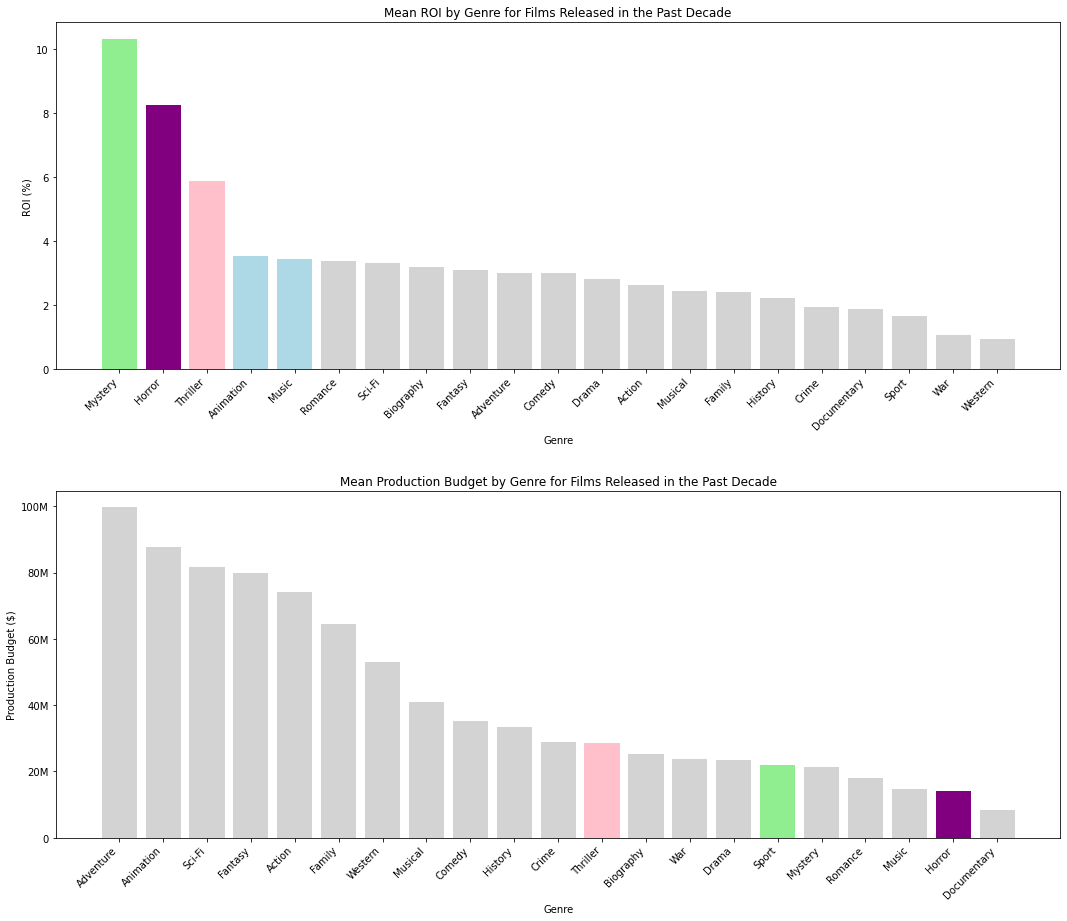

In [35]:
#concatinanting all genres
all_f_df = concatenate_all_genres(master_df, unique_f_dict)

#removing columns
remove_columns = ['movie_id']
all_f_df.drop(columns=remove_columns, inplace=True)

#visualization
viz_df = all_f_df.loc[all_f_df['Year'] > 2010].copy()

#mean
mean_ROI_by_f_df = viz_df.groupby('genre').mean()
mean_ROI_by_f_df.sort_values('ROI', inplace=True, ascending=False)

mean_prod_budget_by_f_df = viz_df.groupby('genre').mean()
mean_prod_budget_by_f_df.sort_values('production_budget', inplace=True, ascending=False)

#bar plot
fig, (ax1, ax2) = plt.subplots(2, figsize=(18,15))

colors_ax1 = ['lightgreen', 'purple', 'pink', 'lightblue', 'lightblue', 'lightgrey', 
              'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
              'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
              'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
ax1.bar(x=mean_ROI_by_f_df.index, height=mean_ROI_by_f_df['ROI'], color=colors_ax1)
ax1.set_xlabel('Genre')
ax1.set_ylabel('ROI (%)')
ax1.set_title('Mean ROI by Genre for Films Released in the Past Decade')

colors_ax2 = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
              'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'pink',
              'lightgrey', 'lightgrey', 'lightgrey', 'lightgreen', 'lightgrey', 'lightgrey',
              'lightgrey', 'purple', 'lightgrey']
ax2.bar(x=mean_prod_budget_by_f_df.index, height=mean_prod_budget_by_f_df['production_budget'],
        color=colors_ax2)
ax2.set_xlabel('Genre')
ax2.set_ylabel('Production Budget ($)')
ax2.set_title('Mean Production Budget by Genre for Films Released in the Past Decade')
ax2.ticklabel_format(axis='y', useOffset=False, style='plain')
y = np.array([0, 20000000, 40000000, 60000000, 80000000, 100000000])
y_ticks_labels = ["0", "20M", "40M", "60M", "80M", "100M"]
ax2.set_yticks(y)
ax2.set_yticklabels(y_ticks_labels)

plt.subplots_adjust(hspace=0.35)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right");
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha="right");




### Business Recommendation 2

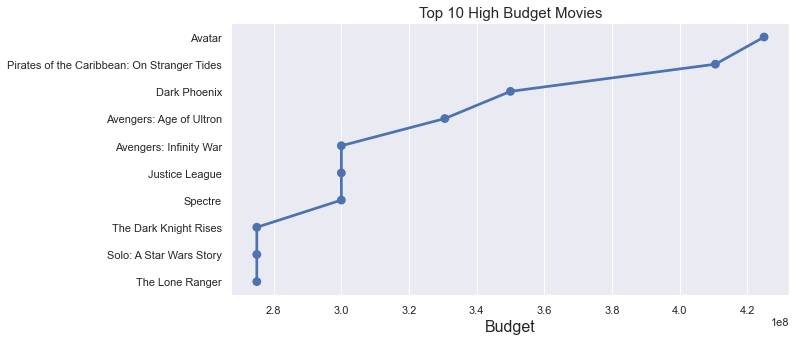

In [40]:
#setup for scatter plot

#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(master_df['production_budget'].sort_values(ascending = False))
info['movie'] = master_df['movie']
data = list(map(str,(info['movie'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['production_budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 16)
sns.set_style("darkgrid")




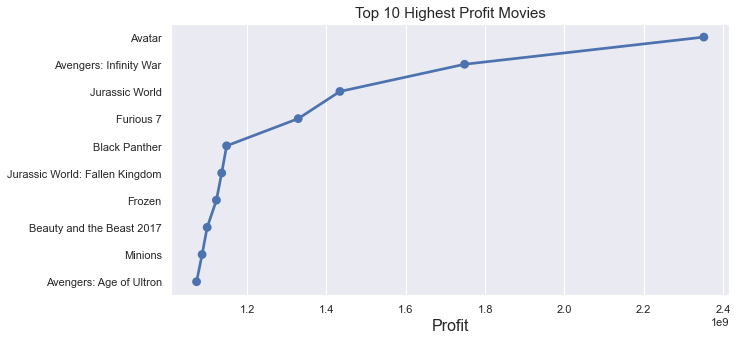

In [38]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(master_df['Profit'].sort_values(ascending = False))
info['movie'] = master_df['movie']
data = list(map(str,(info['movie'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['Profit'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Profit Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 16)
sns.set_style("darkgrid")

### Business Recommendation 3

In [ ]:
master_df.groupby('runtime')['Profit'].mean().plot(figsize = (13,5),xticks=np.arange(0,500,150))

#setup the title of the figure
plt.title("Runtime Vs Profit",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Profit',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")